In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import required libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

## Preparing the Data

#### Step 1: Read the `diabetes_prediction_dataset.csv` data into a Pandas DataFrame

In [2]:
diab_pred_df = pd.read_csv(Path('Resources/diabetes_prediction_dataset.csv'))
diab_pred_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.00,0,0,No Info,27.32,6.20,90,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


In [3]:
diab_pred_df.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

#### Step 2: Evaluating the data

In [4]:
# Evaluate the dataset information
diab_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Check for duplicated data
diab_pred_df.duplicated().sum()

3854

In [6]:
# Remove duplicated rows
diab_pred_df = diab_pred_df.drop_duplicates()

In [7]:
# Check the `smoking_history` column's values 
diab_pred_df.smoking_history.value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [8]:
# Check the `gender` column's values
diab_pred_df.gender.value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [9]:
# Mapping for conversion of `gender`
df1 = diab_pred_df.replace({'Male':0, 'Female':1})

# Drop rows with `Other` value in the `gender` column
df1 = df1[df1['gender'] != 'Other']

# Convert to integers
df1['gender'] = df1['gender'].astype(int)
df1 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,never,25.19,6.60,140,0
1,1,54.00,0,0,No Info,27.32,6.60,80,0
2,0,28.00,0,0,never,27.32,5.70,158,0
3,1,36.00,0,0,current,23.45,5.00,155,0
4,0,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.00,0,0,No Info,24.60,4.80,145,0
99996,1,2.00,0,0,No Info,17.37,6.50,100,0
99997,0,66.00,0,0,former,27.83,5.70,155,0
99998,1,24.00,0,0,never,35.42,4.00,100,0


In [10]:
# How many of each `gender`
df1.gender.value_counts()

# There are 56161 Females
# and 39967 Males

1    56161
0    39967
Name: gender, dtype: int64

In [14]:
# Mapping for conversion of `smoking_history`
df1 = df1.replace({'No Info':0, 'never':1, 'former':2, 'current':2, 'not current':2, 'ever':2})

df1 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,1,25.19,6.60,140,0
1,1,54.00,0,0,0,27.32,6.60,80,0
2,0,28.00,0,0,1,27.32,5.70,158,0
3,1,36.00,0,0,2,23.45,5.00,155,0
4,0,76.00,1,1,2,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.00,0,0,0,24.60,4.80,145,0
99996,1,2.00,0,0,0,17.37,6.50,100,0
99997,0,66.00,0,0,2,27.83,5.70,155,0
99998,1,24.00,0,0,1,35.42,4.00,100,0


In [16]:
# Overview of the cleaned data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  int32  
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  int64  
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 7.0 MB


In [17]:
# Check the outcome where
# 0 = No Diabetes
# 1 = Diabetes
df1.diabetes.value_counts()
 

0    87646
1     8482
Name: diabetes, dtype: int64

In [18]:
df1 = df1.reset_index(inplace=False, drop="index")

df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,1,25.19,6.60,140,0
1,1,54.00,0,0,0,27.32,6.60,80,0
2,0,28.00,0,0,1,27.32,5.70,158,0
3,1,36.00,0,0,2,23.45,5.00,155,0
4,0,76.00,1,1,2,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
96123,1,36.00,0,0,0,24.60,4.80,145,0
96124,1,2.00,0,0,0,17.37,6.50,100,0
96125,0,66.00,0,0,2,27.83,5.70,155,0
96126,1,24.00,0,0,1,35.42,4.00,100,0


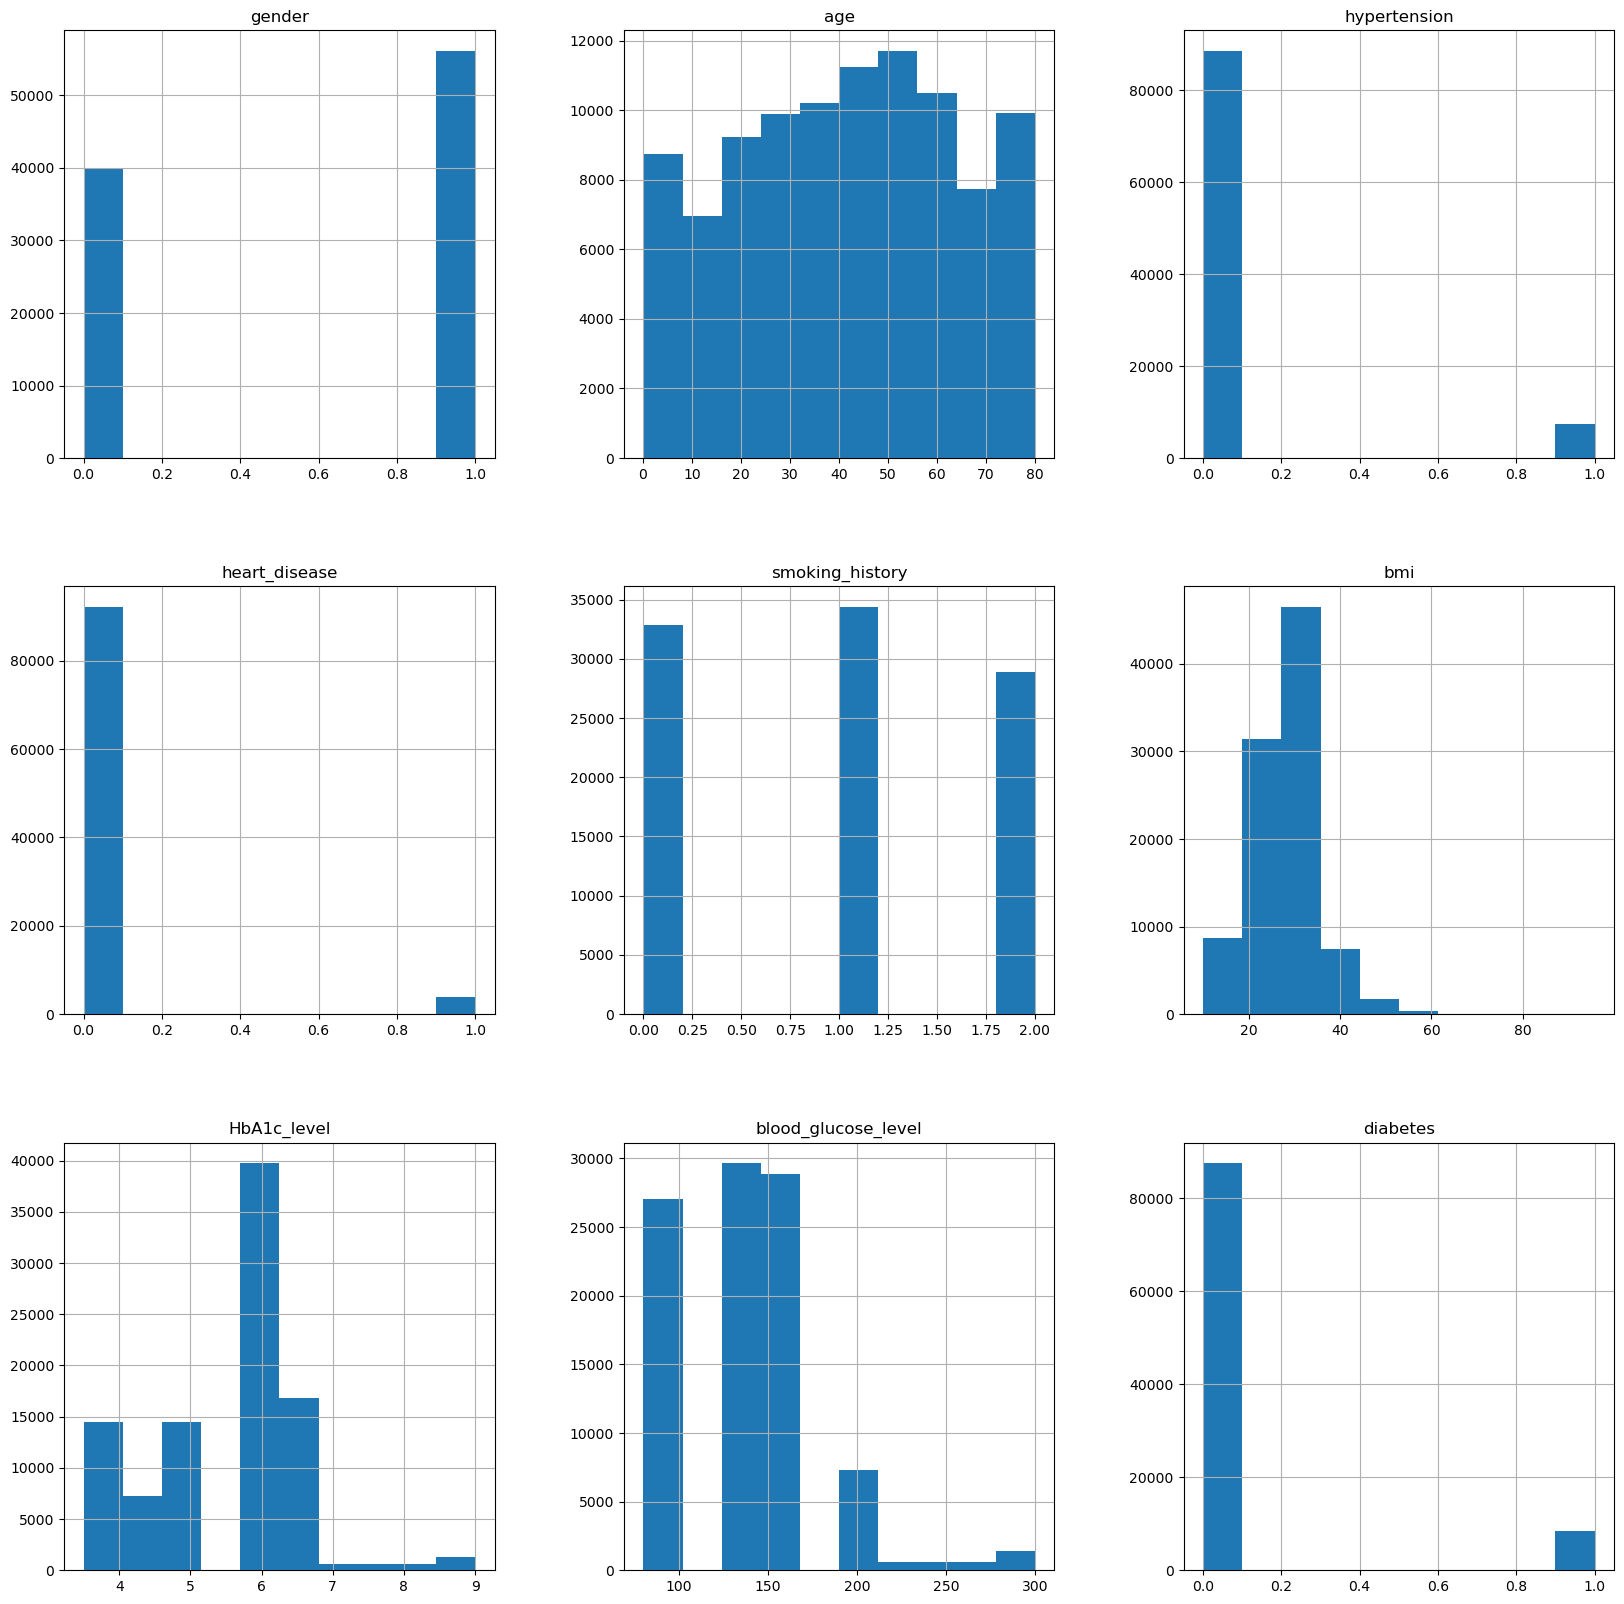

In [23]:
# Visualising the data distribution plots
p = df1.hist(figsize = (20,20))

In [24]:
# Determine which parameters correlate closely with predicting Diabetes
df1.corr()['diabetes'].sort_values()


gender                -0.04
smoking_history        0.12
heart_disease          0.17
hypertension           0.20
bmi                    0.21
age                    0.26
HbA1c_level            0.41
blood_glucose_level    0.42
diabetes               1.00
Name: diabetes, dtype: float64

## Split the Data into Training and Testing Sets  
### Step 1: Create the labels set (`y`) from the 'diabetes' column and then create the features (`X`) DataFrame from the remaining columns

In [26]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df1['diabetes']

# Separate the X variable, the features
X = df1.drop(columns=['diabetes'])

In [27]:
# Review the y variable Series
display(y)


0        0
1        0
2        0
3        0
4        0
        ..
96123    0
96124    0
96125    0
96126    0
96127    0
Name: diabetes, Length: 96128, dtype: int64

In [28]:
# Review the X variable DataFrame
display(X)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.00,0,1,1,25.19,6.60,140
1,1,54.00,0,0,0,27.32,6.60,80
2,0,28.00,0,0,1,27.32,5.70,158
3,1,36.00,0,0,2,23.45,5.00,155
4,0,76.00,1,1,2,20.14,4.80,155
...,...,...,...,...,...,...,...,...
96123,1,36.00,0,0,0,24.60,4.80,145
96124,1,2.00,0,0,0,17.37,6.50,100
96125,0,66.00,0,0,2,27.83,5.70,155
96126,1,24.00,0,0,1,35.42,4.00,100


### Step 2: Split the data into training and testing datasets by using `train_test_split`.

In [29]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 42 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    stratify=y)

X_train.shape 
# training dataset: 72096 rows & 8 columns


(72096, 8)

In [30]:
X_test.shape 
# testing dataset: 24032 rows & 8 columns

(24032, 8)

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [31]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 42 to the model
logistic_model = LogisticRegression(
    solver='lbfgs',
    max_iter=200,
    random_state=42)

# Fit the model using training data
logistic_model.fit(X_train, y_train)
# y_pred = logistic_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

LogisticRegression(max_iter=200, random_state=42)

In [33]:
# logistic_model.score(X_test, y_test)
print(f"Training Data Score: {round(logistic_model.score(X_train, y_train), 3)}")
print(f"Testing Data Score: {round(logistic_model.score(X_test, y_test), 3)}")

Training Data Score: 0.959
Testing Data Score: 0.957


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [38]:
# Make a prediction using the testing data
predictions = logistic_model.predict(X_test)
pd.DataFrame({'Prediction': predictions, 'Actual': y_test}).reset_index(drop=True).head(20)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


In [39]:
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,1,25.19,6.60,140,0
1,1,54.00,0,0,0,27.32,6.60,80,0
2,0,28.00,0,0,1,27.32,5.70,158,0
3,1,36.00,0,0,2,23.45,5.00,155,0
4,0,76.00,1,1,2,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
96123,1,36.00,0,0,0,24.60,4.80,145,0
96124,1,2.00,0,0,0,17.37,6.50,100,0
96125,0,66.00,0,0,2,27.83,5.70,155,0
96126,1,24.00,0,0,1,35.42,4.00,100,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [40]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)


array([[21676,   236],
       [  794,  1326]], dtype=int64)

In [41]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21912
           1       0.85      0.63      0.72      2120

    accuracy                           0.96     24032
   macro avg       0.91      0.81      0.85     24032
weighted avg       0.95      0.96      0.95     24032



### Step 4: Analysis

**Question:**  
How well does the logistic regression model predict both the `0` (healthy participants) and `1` (participants with diabetes) labels?

**Answer:**  
Precision: The ability of the classifier not to label as positive a sample that is negative. For class `0`, it is 96% indicating that when the model predicts class `0`(no diabetes), it is usually correct.  For class `1`, the precision is 85%, suggesting that 85% of the instances predicted as `1`(diabetes) were actually `1`.

Recall: The ability of the classifier to find all the positive samples. For class `0`, it is 99%, suggesting that the model captures most of the actual class `0` instances. For class `1`, it is lower at 63%, indicating that the model misses some of the actual class `1`(diabetes) instances.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. Class `0` has a high F1-score (0.98), while class `1` has a lower but still reasonable F1-score (0.72).

Support: The number of actual occurrences of the class in this dataset. Class `0` has significantly more instances (21912) compared to class `1` (2120).

Accuracy: The overall correctness of the model, meaning that 96% of all instances are correctly classified.

Macro avg: The average of the precision, recall, and F1-score for both classes, without considering class imbalance.

Weighted avg: The weighted average of precision, recall, and F1-score, where the weights are the support values for each class. It accounts for class imbalance. Since class `0` has significantly more instances, the weighted average leans more towards the metrics for class `0`(no diabetes). The weighted average precision, recall, and F1-score are 95%, 96%, and 95% respectively.

In summary, the model performs well overall with high accuracy, but there is a notable difference in performance between the two classes. Class `0`(no diabetes) is well-predicted with high precision and recall. For class `1`(diabetes) it is weaker, especially in recall at 63%, indicating that it struggles more to correctly identify instances of class `1`.